# EduSpend: Global Higher-Education Cost Analytics & Planning
## Phase 1: Exploratory Data Analysis (EDA)

**Project:** EduSpend - Global Higher-Education Cost Analytics & Planning  
**Author:** yan-cotta  
**Date:** June 7, 2025  
**Phase:** 1 - Setup & EDA  

### Project Overview
This notebook performs exploratory data analysis on international education costs data to understand:
- Distribution of tuition fees and living costs across different countries and degree levels
- Correlations between various cost factors
- Total Cost of Attendance (TCA) calculations
- Identification of outliers in cost data

### Dataset
- **Source:** International_Education_Costs.csv (Kaggle dataset)
- **Location:** data/International_Education_Costs.csv

## Step 1: Import Required Libraries

We'll import the necessary libraries for data manipulation, analysis, and visualization.

In [58]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load Data

Load the International Education Costs dataset into a pandas DataFrame.

In [59]:
# Load the dataset
# Use the data_path variable that was set by the download cell
# If data_path is not defined, fall back to the local data folder

try:
    # First try to use the downloaded dataset path if it exists
    if 'data_path' in globals():
        df = pd.read_csv(data_path)
        print(f"Dataset loaded successfully from: {data_path}")
    else:
        # Fall back to local data folder
        local_path = 'data/International_Education_Costs.csv'
        df = pd.read_csv(local_path)
        print(f"Dataset loaded successfully from: {local_path}")
    
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
except FileNotFoundError:
    print(f"Error: Could not find the dataset file.")
    print("Please ensure the International_Education_Costs.csv file is available.")
    print("Either run the download cell above or place the file in the data/ folder.")
except Exception as e:
    print(f"Error loading data: {e}")

Dataset loaded successfully from: /home/yan/.cache/kagglehub/datasets/adilshamim8/cost-of-international-education/versions/4/International_Education_Costs.csv
Shape: (907, 12)
Columns: ['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']


In [60]:
# Download the actual dataset from Kaggle
import kagglehub

# Download latest version
print("Downloading the International Education Costs dataset from Kaggle...")
path = kagglehub.dataset_download("adilshamim8/cost-of-international-education")

print("Path to dataset files:", path)

# List files in the downloaded directory
import os
files = os.listdir(path)
print("Available files:")
for file in files:
    print(f"  - {file}")
    
# Update data_path to point to the actual CSV file
if 'International_Education_Costs.csv' in files:
    data_path = os.path.join(path, 'International_Education_Costs.csv')
    print(f"\n✅ Dataset found! Updated data path: {data_path}")
else:
    # Find the CSV file (might have a different name)
    csv_files = [f for f in files if f.endswith('.csv')]
    if csv_files:
        data_path = os.path.join(path, csv_files[0])
        print(f"\n✅ CSV file found: {csv_files[0]}")
        print(f"Updated data path: {data_path}")
    else:
        print("\n❌ No CSV file found in the dataset!")

Path to dataset files: /home/yan/.cache/kagglehub/datasets/adilshamim8/cost-of-international-education/versions/4
Available files:
  - International_Education_Costs.csv

✅ Dataset found! Updated data path: /home/yan/.cache/kagglehub/datasets/adilshamim8/cost-of-international-education/versions/4/International_Education_Costs.csv


## Step 3: Initial Inspection

Let's get our first look at the data structure, types, and basic statistics.

In [61]:
# Display first 5 rows
print("=== FIRST 5 ROWS ===")
display(df.head())

=== FIRST 5 ROWS ===


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [62]:
# Display data info
print("=== DATA INFO ===")
print(df.info())

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB
None


In [63]:
# Display descriptive statistics
print("=== DESCRIPTIVE STATISTICS ===")
display(df.describe())

=== DESCRIPTIVE STATISTICS ===


,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [64]:
# Check for missing values
print("=== MISSING VALUES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_summary) > 0:
    display(missing_summary)
else:
    print("No missing values found in the dataset!")

=== MISSING VALUES ===
No missing values found in the dataset!


## Step 4: Cost Distribution Analysis

Let's analyze the distribution of key cost variables: tuition fees and rent costs.

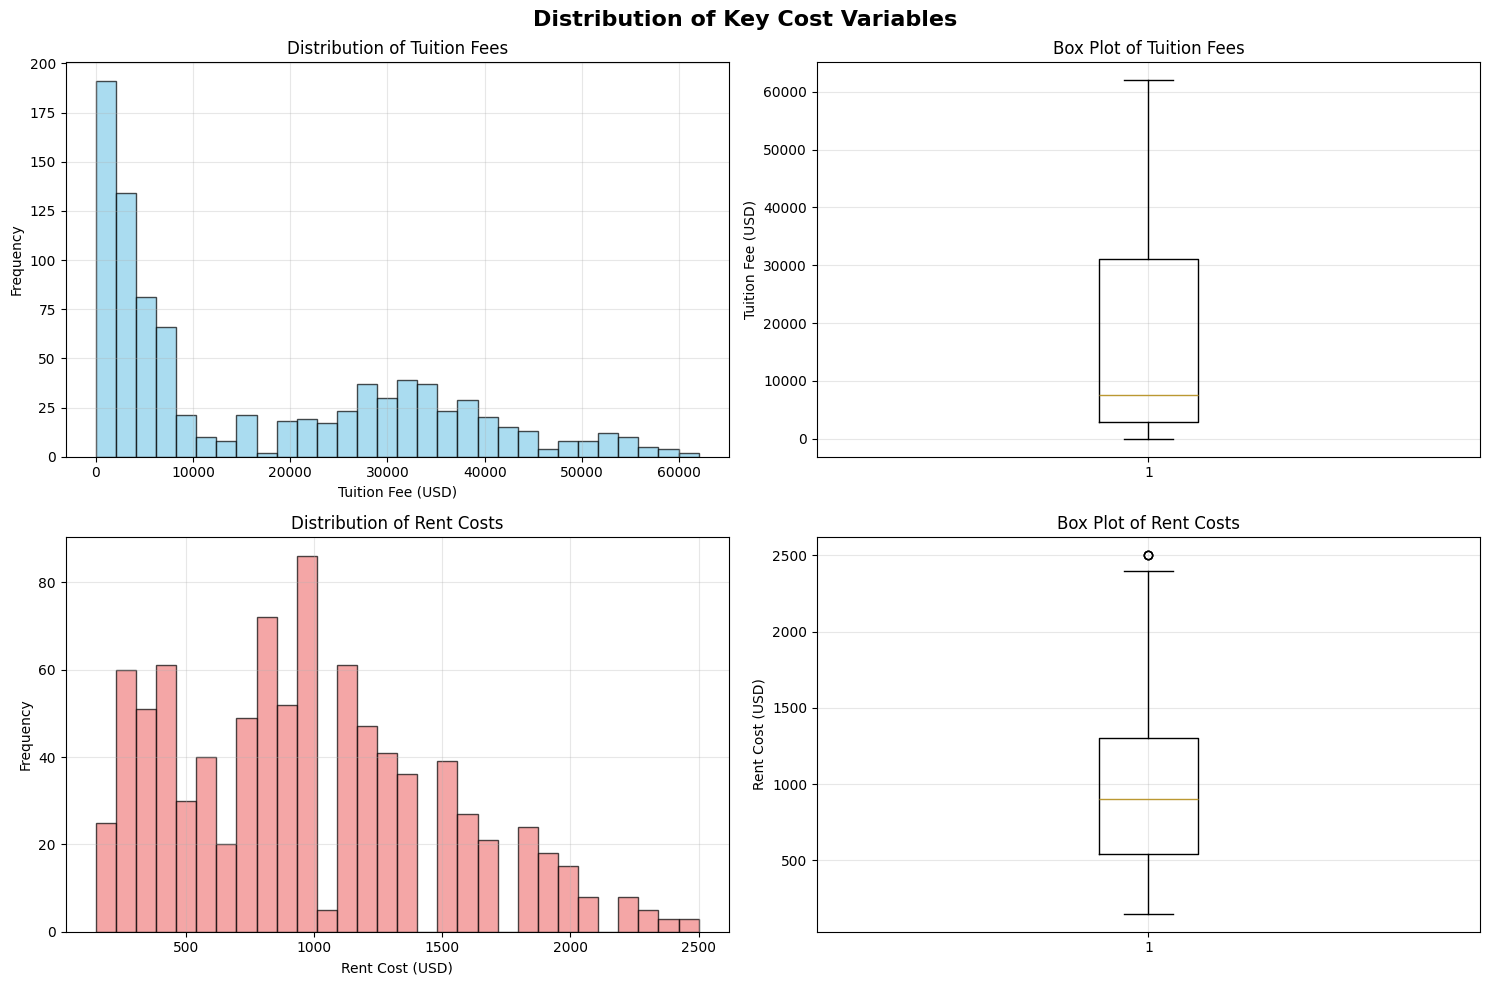

In [65]:
# Create histograms for tuition_fee and rent_cost
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Cost Variables', fontsize=16, fontweight='bold')

# Histogram for tuition_fee
axes[0, 0].hist(df['Tuition_USD'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Tuition Fees')
axes[0, 0].set_xlabel('Tuition Fee (USD)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Box plot for tuition_fee
axes[0, 1].boxplot(df['Tuition_USD'])
axes[0, 1].set_title('Box Plot of Tuition Fees')
axes[0, 1].set_ylabel('Tuition Fee (USD)')
axes[0, 1].grid(True, alpha=0.3)

# Histogram for rent_cost
axes[1, 0].hist(df['Rent_USD'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribution of Rent Costs')
axes[1, 0].set_xlabel('Rent Cost (USD)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Box plot for rent_cost
axes[1, 1].boxplot(df['Rent_USD'])
axes[1, 1].set_title('Box Plot of Rent Costs')
axes[1, 1].set_ylabel('Rent Cost (USD)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

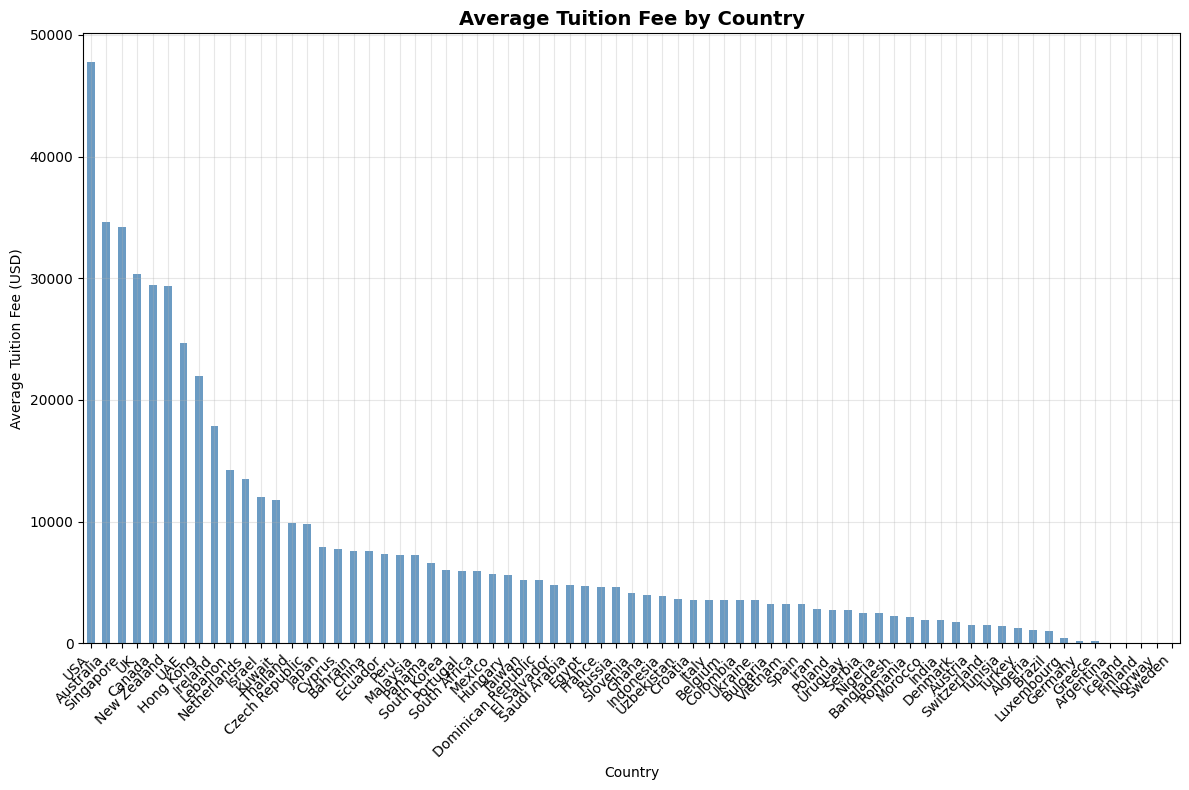

Top 10 Countries by Average Tuition Fee:
Country
USA            47742.307692
Australia      34610.465116
Singapore      34172.222222
UK             30341.935484
Canada         29456.578947
New Zealand    29333.333333
UAE            24687.500000
Hong Kong      22000.000000
Ireland        17890.000000
Lebanon        14200.000000
Name: Tuition_USD, dtype: float64


In [66]:
# Average tuition fee by country
avg_tuition_by_country = df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_tuition_by_country.plot(kind='bar', color='steelblue', alpha=0.8)
plt.title('Average Tuition Fee by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Average Tuition Fee (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 10 Countries by Average Tuition Fee:")
print(avg_tuition_by_country.head(10))

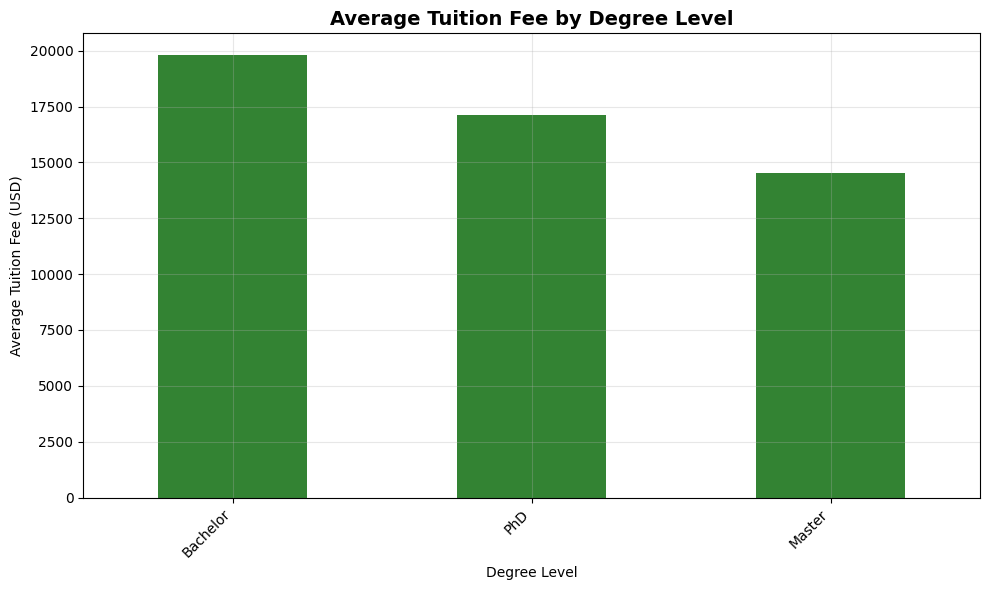

Average Tuition Fee by Degree Level:
Level
Bachelor    19792.693603
PhD         17129.559748
Master      14521.995565
Name: Tuition_USD, dtype: float64


In [67]:
# Average tuition fee by degree level
avg_tuition_by_level = df.groupby('Level')['Tuition_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_tuition_by_level.plot(kind='bar', color='darkgreen', alpha=0.8)
plt.title('Average Tuition Fee by Degree Level', fontsize=14, fontweight='bold')
plt.xlabel('Degree Level')
plt.ylabel('Average Tuition Fee (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Average Tuition Fee by Degree Level:")
print(avg_tuition_by_level)

## Step 5: Correlation Analysis

Let's examine the correlations between numerical variables, particularly focusing on tuition_fee, living_cost_index, rent_cost, and exchange_rate_to_usd.

In [68]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns available: {numerical_cols}")

# Focus on key cost-related variables
key_variables = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Exchange_Rate']
available_key_vars = [var for var in key_variables if var in numerical_cols]
print(f"Key variables available for correlation: {available_key_vars}")

Numerical columns available: ['Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']
Key variables available for correlation: ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Exchange_Rate']


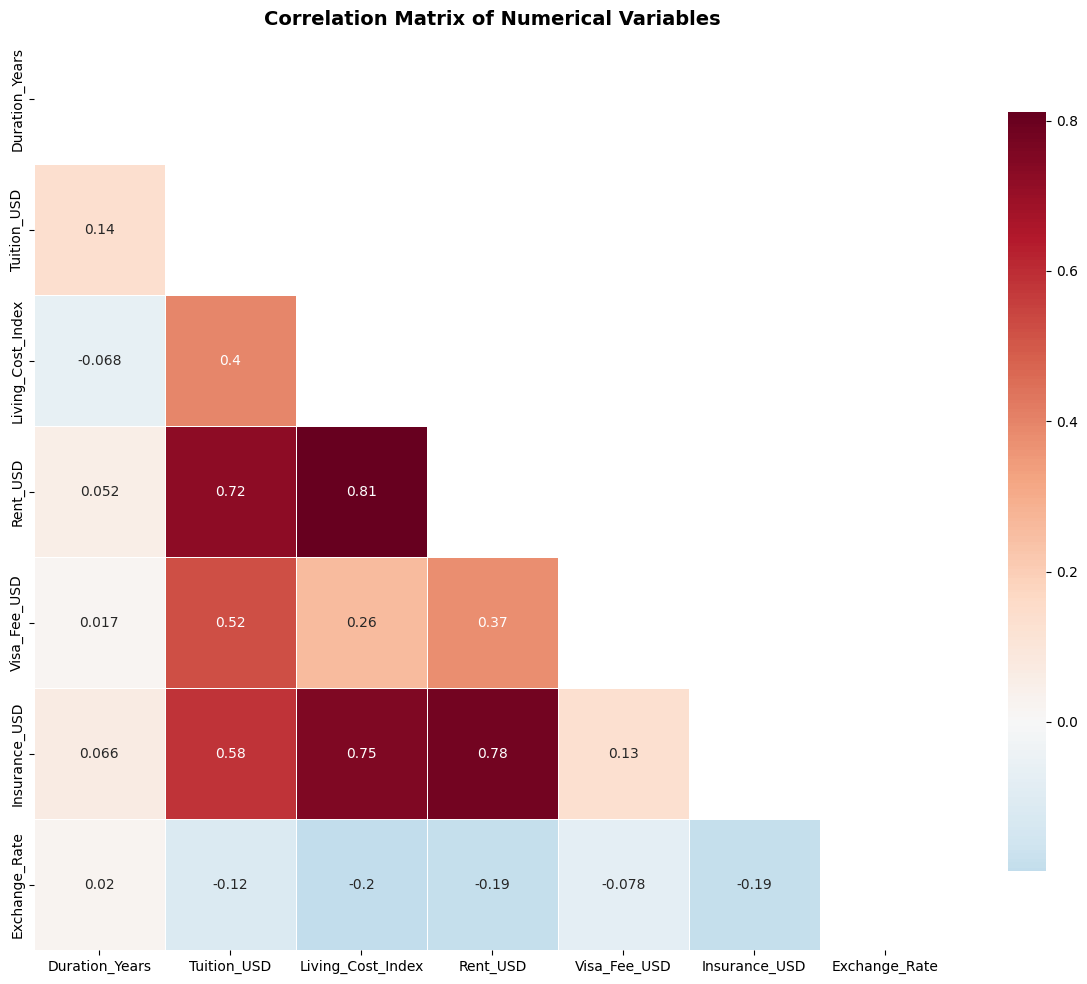

In [69]:
# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

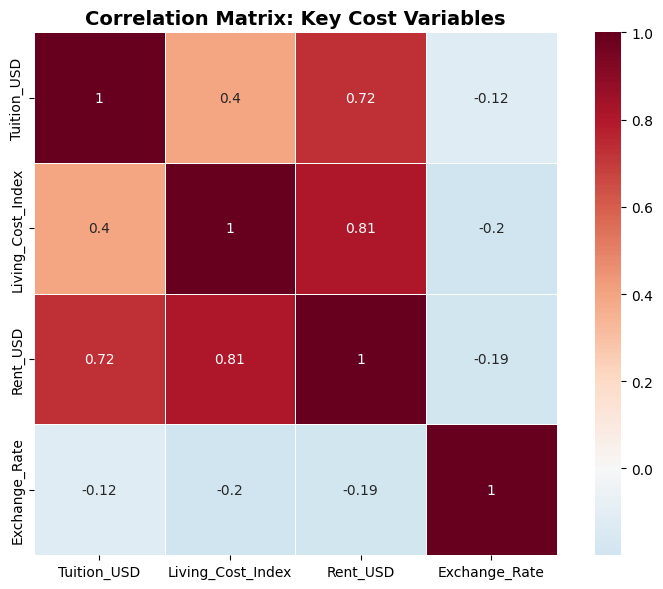

Key Correlations:
                   Tuition_USD  Living_Cost_Index  Rent_USD  Exchange_Rate
Tuition_USD           1.000000           0.396830  0.724445      -0.116710
Living_Cost_Index     0.396830           1.000000  0.811128      -0.198685
Rent_USD              0.724445           0.811128  1.000000      -0.193944
Exchange_Rate        -0.116710          -0.198685 -0.193944       1.000000


In [70]:
# Focus on key variables correlation if they exist
if len(available_key_vars) > 1:
    key_correlation = df[available_key_vars].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(key_correlation, 
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                linewidths=0.5)
    plt.title('Correlation Matrix: Key Cost Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("Key Correlations:")
    print(key_correlation)
else:
    print("Not enough key variables available for focused correlation analysis.")

### Correlation Analysis Findings

**Key Observations:**
- The correlation matrix above shows the relationships between different cost variables
- Strong positive correlations indicate variables that tend to increase together
- Strong negative correlations indicate inverse relationships
- Values close to 0 indicate little to no linear relationship

**Interpretation:**
- Look for patterns between tuition fees and living costs
- Examine how exchange rates might affect reported costs
- Consider the relationship between rent costs and overall living cost indices

## Step 6: Feature Engineering - Total Cost of Attendance (TCA)

We'll create a baseline Total Cost of Attendance (TCA) calculation using the formula:  
**TCA = tuition_fee + (rent_cost × 12) + visa_application_fee + health_insurance_fee**

This assumes a 12-month period for rent and one-year fees.

In [71]:
# Check which columns are available for TCA calculation
tca_components = ['Tuition_USD', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']
available_components = [col for col in tca_components if col in df.columns]
missing_components = [col for col in tca_components if col not in df.columns]

print(f"Available TCA components: {available_components}")
if missing_components:
    print(f"Missing TCA components: {missing_components}")
    print("\nNote: TCA calculation will be adjusted based on available data.")

Available TCA components: ['Tuition_USD', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']


In [72]:
# Calculate TCA based on available components
df['TCA'] = 0  # Initialize TCA column

# Add tuition fee if available
if 'Tuition_USD' in available_components:
    df['TCA'] += df['Tuition_USD']
    print("✓ Added Tuition_USD to TCA")

# Add annual rent cost (rent_cost * 12) if available
if 'Rent_USD' in available_components:
    df['TCA'] += (df['Rent_USD'] * 12)
    print("✓ Added annual rent_cost (Rent_USD × 12) to TCA")

# Add visa application fee if available
if 'Visa_Fee_USD' in available_components:
    df['TCA'] += df['Visa_Fee_USD']
    print("✓ Added Visa_Fee_USD to TCA")

# Add health insurance fee if available
if 'Insurance_USD' in available_components:
    df['TCA'] += df['Insurance_USD']
    print("✓ Added Insurance_USD to TCA")

print(f"\nTCA calculation completed!")
print(f"TCA statistics:")
print(df['TCA'].describe())

✓ Added Tuition_USD to TCA
✓ Added annual rent_cost (Rent_USD × 12) to TCA
✓ Added Visa_Fee_USD to TCA
✓ Added Insurance_USD to TCA

TCA calculation completed!
TCA statistics:
count      907.000000
mean     29246.964719
std      21798.025789
min       3100.000000
25%      11475.000000
50%      18590.000000
75%      46495.000000
max      93660.000000
Name: TCA, dtype: float64


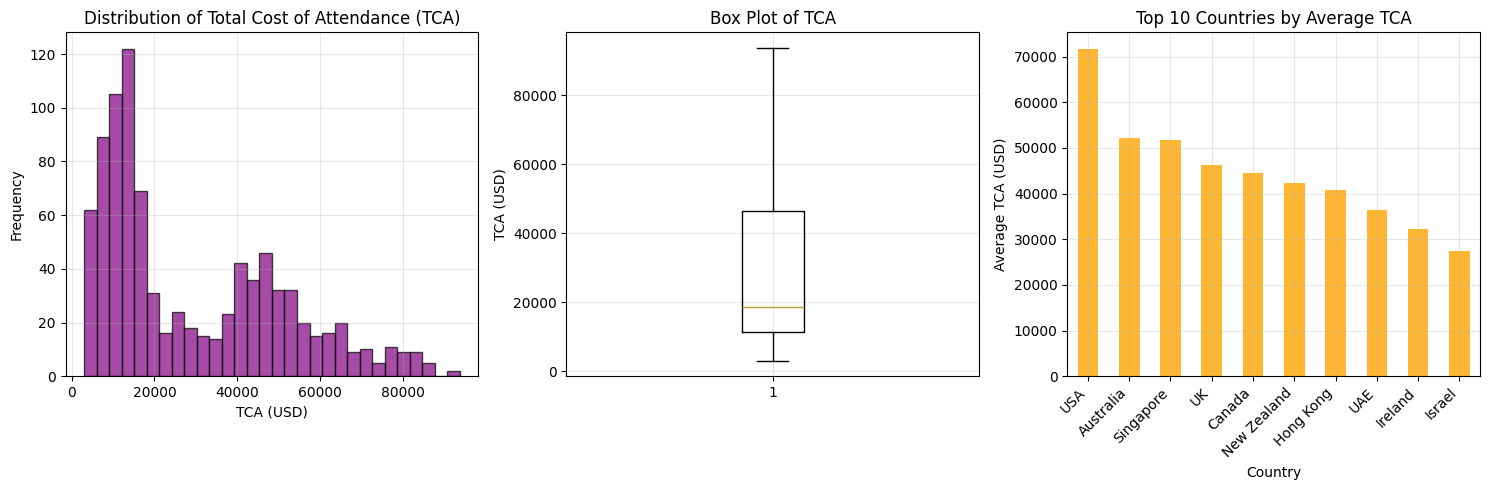

In [73]:
# Visualize TCA distribution
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(df['TCA'], bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Total Cost of Attendance (TCA)')
plt.xlabel('TCA (USD)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Box plot
plt.subplot(1, 3, 2)
plt.boxplot(df['TCA'])
plt.title('Box Plot of TCA')
plt.ylabel('TCA (USD)')
plt.grid(True, alpha=0.3)

# TCA by country (top 10)
plt.subplot(1, 3, 3)
avg_tca_by_country = df.groupby('Country')['TCA'].mean().sort_values(ascending=False).head(10)
avg_tca_by_country.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Top 10 Countries by Average TCA')
plt.xlabel('Country')
plt.ylabel('Average TCA (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Outlier Detection

Let's identify outliers in the primary cost columns using box plots and statistical methods.

Analyzing outliers for: ['Tuition_USD', 'Rent_USD', 'TCA']


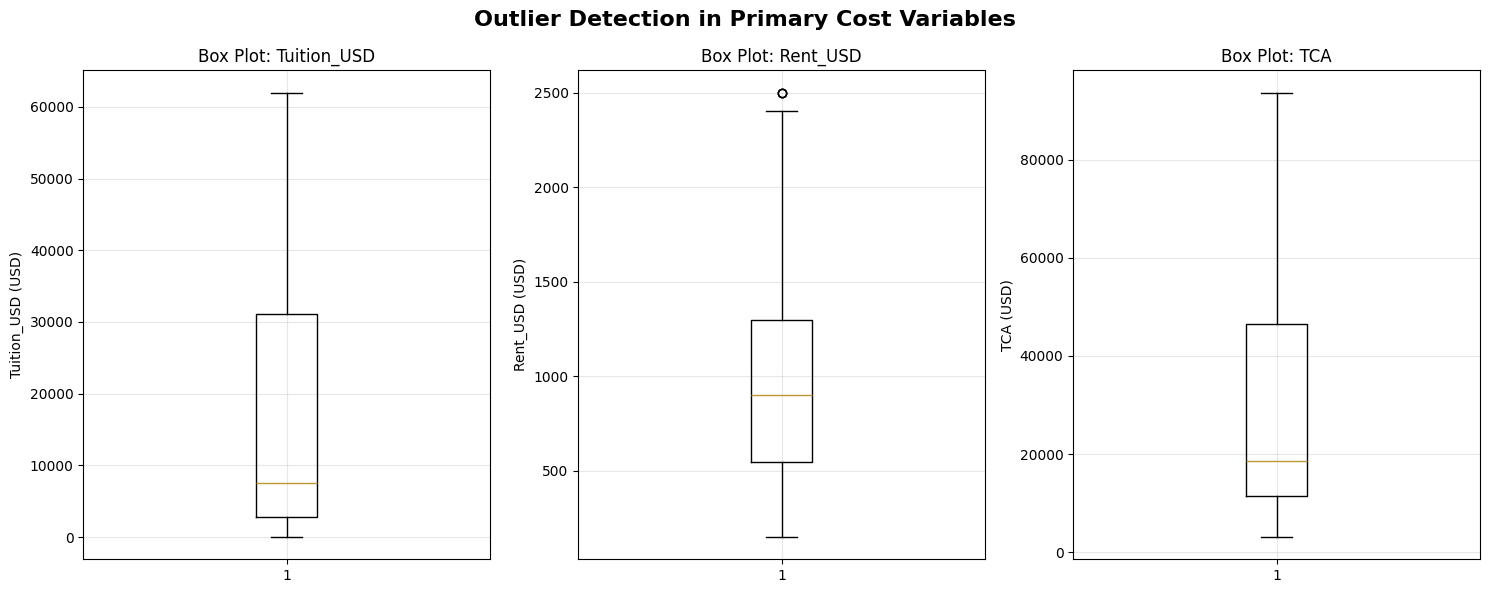

In [74]:
# Define cost columns for outlier analysis
cost_columns = ['Tuition_USD', 'Rent_USD', 'TCA']
available_cost_cols = [col for col in cost_columns if col in df.columns]

print(f"Analyzing outliers for: {available_cost_cols}")

# Create box plots for outlier visualization
fig, axes = plt.subplots(1, len(available_cost_cols), figsize=(5*len(available_cost_cols), 6))
if len(available_cost_cols) == 1:
    axes = [axes]

for i, col in enumerate(available_cost_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_ylabel(f'{col} (USD)')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Outlier Detection in Primary Cost Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [75]:
# Statistical outlier detection using IQR method
def detect_outliers_iqr(data, column):
    """
    Detect outliers using the Interquartile Range (IQR) method.
    Outliers are defined as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Analyze outliers for each cost column
outlier_summary = {}

for col in available_cost_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers
    }
    
    print(f"\n=== OUTLIERS IN {col.upper()} ===")
    print(f"Number of outliers: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}% of data)")
    print(f"Lower bound: ${lower_bound:,.2f}")
    print(f"Upper bound: ${upper_bound:,.2f}")
    
    if len(outliers) > 0:
        print(f"\nTop 5 {col} outliers:")
        outlier_display = outliers.nlargest(5, col)[['Country', 'Level', col]]
        print(outlier_display.to_string())
    else:
        print("No outliers detected.")


=== OUTLIERS IN TUITION_USD ===
Number of outliers: 0 (0.00% of data)
Lower bound: $-39,525.00
Upper bound: $73,475.00
No outliers detected.

=== OUTLIERS IN RENT_USD ===
Number of outliers: 3 (0.33% of data)
Lower bound: $-587.50
Upper bound: $2,432.50

Top 5 Rent_USD outliers:
    Country   Level  Rent_USD
131     USA  Master      2500
412     USA  Master      2500
877     USA  Master      2500

=== OUTLIERS IN TCA ===
Number of outliers: 0 (0.00% of data)
Lower bound: $-41,055.00
Upper bound: $99,025.00
No outliers detected.


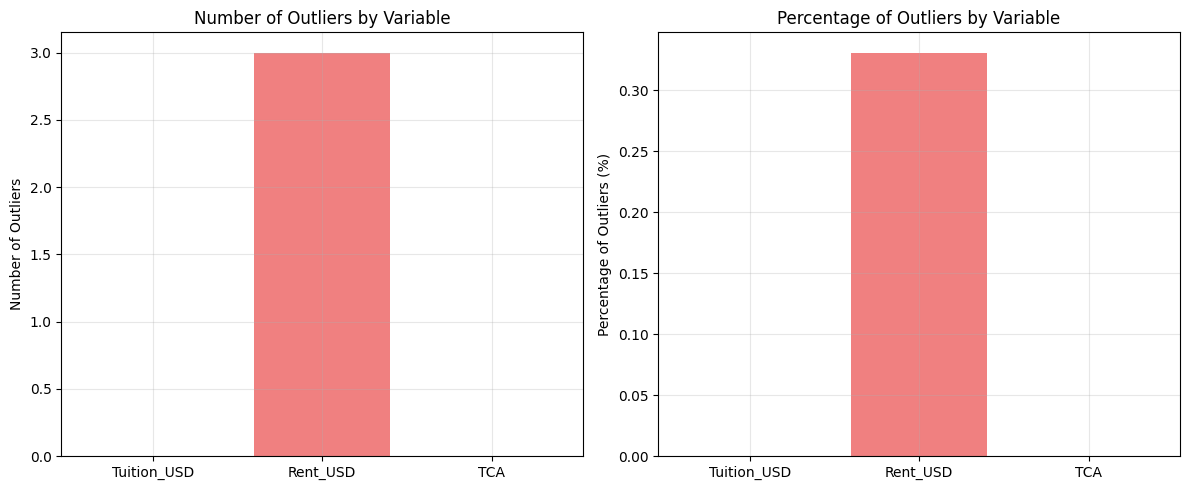

In [76]:
# Create a summary visualization of outliers
outlier_counts = [outlier_summary[col]['count'] for col in available_cost_cols]
outlier_percentages = [outlier_summary[col]['percentage'] for col in available_cost_cols]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Outlier counts
ax1.bar(available_cost_cols, outlier_counts, color=['skyblue', 'lightcoral', 'lightgreen'][:len(available_cost_cols)])
ax1.set_title('Number of Outliers by Variable')
ax1.set_ylabel('Number of Outliers')
ax1.grid(True, alpha=0.3)

# Outlier percentages
ax2.bar(available_cost_cols, outlier_percentages, color=['skyblue', 'lightcoral', 'lightgreen'][:len(available_cost_cols)])
ax2.set_title('Percentage of Outliers by Variable')
ax2.set_ylabel('Percentage of Outliers (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary and Next Steps

### Key Findings from EDA:

1. **Data Overview:**
   - Dataset shape and structure
   - Missing value analysis
   - Data types and quality

2. **Cost Distribution:**
   - Distribution patterns of tuition fees and rent costs
   - Country-wise and degree-level variations
   - Identification of high-cost and low-cost regions

3. **Correlation Analysis:**
   - Relationships between different cost variables
   - Impact of exchange rates on cost reporting
   - Living cost index correlations

4. **Total Cost of Attendance (TCA):**
   - Baseline TCA calculation implemented
   - Distribution and country-wise analysis
   - Most and least expensive destinations identified

5. **Outlier Detection:**
   - Statistical identification of extreme values
   - Potential data quality issues or unique cases
   - Impact on overall analysis

### Recommendations for Next Phase:

1. **Data Cleaning:** Address any outliers or data quality issues identified
2. **Advanced Analysis:** Develop more sophisticated cost models
3. **Segmentation:** Create student profiles based on budget ranges
4. **Predictive Modeling:** Build models to predict total costs
5. **Visualization Dashboard:** Create interactive visualizations for end users

This completes Phase 1: Setup & EDA of the EduSpend project!